In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import time, datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
plt.style.use('seaborn')

In [50]:
confirmed_cases = pd.read_csv('Stateconfirmed.csv')

In [51]:
deaths_reported = pd.read_csv('Statedeceased.csv')

In [52]:
recovered_cases = pd.read_csv('Staterecovered.csv')

In [53]:
# display the head of the dataset
confirmed_cases.head()

,Unnamed: 0,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,09-May-20,10-May-20,11-May-20,12-May-20,13-May-20,14-May-20,15-May-20,16-May-20,17-May-20,18-May-20
0,Andaman And Nicobar,0,0,0,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
1,Andhra Pradesh,1,1,1,1,1,3,3,5,6,...,1930,1980,2018,2089,2137,2205,2289,2337,2362,2414
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Assam,0,0,0,0,0,0,0,0,0,...,62,63,65,65,80,87,87,90,98,113
4,Bihar,0,0,0,0,0,0,0,0,2,...,611,707,749,879,953,999,1033,1178,1320,1423


In [56]:
deaths_reported.head()

,Unnamed: 0,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,09-May-20,10-May-20,11-May-20,12-May-20,13-May-20,14-May-20,15-May-20,16-May-20,17-May-20,18-May-20
0,INDIA,2,2,2,3,3,4,4,4,7,...,2100,2212,2293,2413,2550,2647,2751,2871,3023,3154
1,ANDAMAN AND NICOBAR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ANDHRA PRADESH,0,0,0,0,0,0,0,0,0,...,44,45,45,46,47,48,48,49,50,50
3,ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ASSAM,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,3


In [57]:
recovered_cases.head()

,Unnamed: 0,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,09-May-20,10-May-20,11-May-20,12-May-20,13-May-20,14-May-20,15-May-20,16-May-20,17-May-20,18-May-20
0,INDIA,9,13,14,15,15,20,23,23,23,...,19301,20970,22549,24454,26417,28011,30235,34247,36785,39267
1,ANDAMAN AND NICOBAR,0,0,0,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
2,ANDHRA PRADESH,0,0,0,0,0,0,0,0,0,...,887,925,998,1056,1142,1192,1252,1353,1456,1552
3,ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,ASSAM,0,0,0,0,0,0,0,0,0,...,35,35,40,40,40,40,41,41,42,42


In [58]:
#extracting all the coloumns using the .keys() function
cols = confirmed_cases.keys()
cols

Index(['Unnamed: 0', '14-Mar-20', '15-Mar-20', '16-Mar-20', '17-Mar-20',
       '18-Mar-20', '19-Mar-20', '20-Mar-20', '21-Mar-20', '22-Mar-20',
       '23-Mar-20', '24-Mar-20', '25-Mar-20', '26-Mar-20', '27-Mar-20',
       '28-Mar-20', '29-Mar-20', '30-Mar-20', '31-Mar-20', '01-Apr-20',
       '02-Apr-20', '03-Apr-20', '04-Apr-20', '05-Apr-20', '06-Apr-20',
       '07-Apr-20', '08-Apr-20', '09-Apr-20', '10-Apr-20', '11-Apr-20',
       '12-Apr-20', '13-Apr-20', '14-Apr-20', '15-Apr-20', '16-Apr-20',
       '17-Apr-20', '18-Apr-20', '19-Apr-20', '20-Apr-20', '21-Apr-20',
       '22-Apr-20', '23-Apr-20', '24-Apr-20', '25-Apr-20', '26-Apr-20',
       '27-Apr-20', '28-Apr-20', '29-Apr-20', '30-Apr-20', '01-May-20',
       '02-May-20', '03-May-20', '04-May-20', '05-May-20', '06-May-20',
       '07-May-20', '08-May-20', '09-May-20', '10-May-20', '11-May-20',
       '12-May-20', '13-May-20', '14-May-20', '15-May-20', '16-May-20',
       '17-May-20', '18-May-20'],
      dtype='object')

In [59]:
# extracting only the dates columns that have information about the confirmed, deaths and recoveries
#first parameter tells that we need all rows and second parameter tells us that we need data from 4th col till last col
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]

In [60]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]

In [61]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [62]:
# check the head of the outbreak class
confirmed.head()

,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,24-Mar-20,25-Mar-20,26-Mar-20,...,09-May-20,10-May-20,11-May-20,12-May-20,13-May-20,14-May-20,15-May-20,16-May-20,17-May-20,18-May-20
0,0,0,0,0,0,0,0,0,0,1,...,33,33,33,33,33,33,33,33,33,33
1,1,1,3,3,5,6,7,8,10,11,...,1930,1980,2018,2089,2137,2205,2289,2337,2362,2414
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,62,63,65,65,80,87,87,90,98,113
4,0,0,0,0,0,2,3,3,4,7,...,611,707,749,879,953,999,1033,1178,1320,1423


In [63]:
#finding the total confirmed cases, death cases and recovered cases and appending them to 4 empty lists
#also calculate the total mortality rate which is death_sum/confirmed cases
dates = confirmed.keys()
india_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum=confirmed[i].sum()
    death_sum=deaths[i].sum()
    recovered_sum=recoveries[i].sum()
    india_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [64]:
#let's display each of the newly created variables one by one
confirmed_sum

100306

In [65]:
death_sum

6309

In [66]:
recovered_sum

78534

In [67]:
india_cases

[134,
 171,
 198,
 256,
 334,
 401,
 503,
 567,
 657,
 722,
 886,
 1029,
 1139,
 1326,
 1635,
 2059,
 2545,
 3105,
 3684,
 4293,
 4777,
 5350,
 5915,
 6728,
 7599,
 8453,
 9211,
 10454,
 11485,
 12371,
 13432,
 14354,
 15725,
 17305,
 18544,
 20081,
 21373,
 23040,
 24448,
 26283,
 27890,
 29458,
 31360,
 33065,
 34866,
 37262,
 39826,
 42778,
 46434,
 49405,
 53007,
 56351,
 59690,
 62865,
 67176,
 70768,
 74330,
 78056,
 82047,
 85834,
 90628,
 95677,
 100306]

In [68]:
#convert all the cases and the dates in the form of numpy array
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
india_cases = np.array(india_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [69]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62]])

In [70]:
india_cases

array([[   134],
       [   171],
       [   198],
       [   256],
       [   334],
       [   401],
       [   503],
       [   567],
       [   657],
       [   722],
       [   886],
       [  1029],
       [  1139],
       [  1326],
       [  1635],
       [  2059],
       [  2545],
       [  3105],
       [  3684],
       [  4293],
       [  4777],
       [  5350],
       [  5915],
       [  6728],
       [  7599],
       [  8453],
       [  9211],
       [ 10454],
       [ 11485],
       [ 12371],
       [ 13432],
       [ 14354],
       [ 15725],
       [ 17305],
       [ 18544],
       [ 20081],
       [ 21373],
       [ 23040],
       [ 24448],
       [ 26283],
       [ 27890],
       [ 29458],
       [ 31360],
       [ 33065],
       [ 34866],
       [ 37262],
       [ 39826],
       [ 42778],
       [ 46434],
       [ 49405],
       [ 53007],
       [ 56351],
       [ 59690],
       [ 62865],
       [ 67176],
       [ 70768],
       [ 74330],
       [ 78056],
       [ 82047

In [71]:
total_deaths

array([[   6],
       [   6],
       [   8],
       [   8],
       [   8],
       [  14],
       [  18],
       [  20],
       [  22],
       [  32],
       [  38],
       [  48],
       [  54],
       [  80],
       [  92],
       [ 110],
       [ 138],
       [ 166],
       [ 192],
       [ 236],
       [ 268],
       [ 322],
       [ 362],
       [ 454],
       [ 498],
       [ 579],
       [ 663],
       [ 717],
       [ 791],
       [ 845],
       [ 897],
       [ 973],
       [1043],
       [1119],
       [1185],
       [1291],
       [1363],
       [1443],
       [1561],
       [1649],
       [1761],
       [1877],
       [2015],
       [2157],
       [2307],
       [2461],
       [2645],
       [2925],
       [3131],
       [3387],
       [3569],
       [3777],
       [3971],
       [4201],
       [4425],
       [4587],
       [4827],
       [5101],
       [5295],
       [5503],
       [5743],
       [6047],
       [6309]], dtype=int64)

In [72]:
total_recovered

array([[   30],
       [   30],
       [   40],
       [   46],
       [   46],
       [   46],
       [   70],
       [   80],
       [   86],
       [  100],
       [  152],
       [  170],
       [  180],
       [  278],
       [  308],
       [  340],
       [  384],
       [  460],
       [  572],
       [  658],
       [  788],
       [  938],
       [ 1130],
       [ 1270],
       [ 1572],
       [ 1944],
       [ 2172],
       [ 2396],
       [ 2730],
       [ 3018],
       [ 3534],
       [ 4080],
       [ 4932],
       [ 5708],
       [ 6546],
       [ 7952],
       [ 8740],
       [10024],
       [10992],
       [11876],
       [13046],
       [14206],
       [15478],
       [16858],
       [18118],
       [20042],
       [21704],
       [23526],
       [25690],
       [28280],
       [30602],
       [33552],
       [35774],
       [38602],
       [41940],
       [45098],
       [48908],
       [52834],
       [56022],
       [60470],
       [68494],
       [73570],
       [

In [73]:
#future forecasting for the next ten days

days_in_future = 10
#adding next ten days in the variable with dates
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [74]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72]])

In [75]:
#convert all integers to date time for better visualisation

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [76]:
# for visualisation with the latest data of 15th march
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [77]:
latest_confirmed

0        33
1      2414
2         1
3       113
4      1423
5       196
6        95
7         0
8     10054
9         1
10       38
11    11746
12       90
13      928
14      228
15     1289
16     1246
17      631
18       43
19        0
20    35058
21       13
22        7
23     5236
24        1
25        0
26      876
27     1980
28       17
29     5507
30        0
31     1592
32    11760
33      164
34     4605
35       96
36     2825
Name: 18-May-20, dtype: int64

In [78]:
latest_deaths

0     3154
1        0
2       50
3        0
4        3
5        9
6        3
7        0
8        0
9      160
10       0
11       0
12     694
13       3
14      14
15       3
16      15
17      37
18       4
19       0
20       0
21    1248
22       1
23       0
24     253
25       0
26       0
27       4
28      37
29       0
30     138
31       0
32      34
33      82
34       0
35     118
36       1
37     244
Name: 18-May-20, dtype: int64

In [79]:
latest_recoveries

0     39267
1        33
2      1552
3         1
4        42
5       517
6        54
7        59
8         0
9      4485
10        1
11        7
12     4804
13       43
14      597
15      127
16      609
17      530
18      497
19       43
20        0
21     8437
22       12
23        2
24     2435
25        1
26        0
27      277
28     1547
29        9
30     3208
31        0
32     1002
33     4406
34       89
35     2783
36       52
37     1006
Name: 18-May-20, dtype: int64

In [80]:
#calculating for unique states
unique_states = list(confirmed_cases['Unnamed: 0'].unique())
unique_states


['Andaman And Nicobar',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chattisgarh',
 'Daman And Deu',
 'Delhi',
 'Dadra And Nagar Haveli',
 'Goa',
 'Gujrat',
 'Himachal Pradesh',
 'Harayana',
 'Jharkhand',
 'Jammu And Kashmir',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Lakshadweep',
 'Maharashtra',
 'Meghalaya',
 'Manipur',
 'Madhya Pradesh',
 'Mizoram',
 'Nagaland',
 'Orissa',
 'Punjab',
 'Puducherry',
 'Rajasthan',
 'Sikkim',
 'Telengana',
 'Tamilnadu',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

In [86]:
#calculating the total number of cases per state

state_confirmed_cases = []
no_cases = []
for i in unique_states:
    cases = latest_confirmed[confirmed_cases['Unnamed: 0']==i].sum()
    if cases>0:
        state_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
for i in no_cases:
    unique_states.remove(i)
unique_states = [k for k, v in sorted(zip(unique_states, state_confirmed_cases),key = operator.itemgetter(1), reverse=1)]
for i in range(len(unique_states)):
    state_confirmed_cases[i] = latest_confirmed[confirmed_cases['Unnamed: 0']==unique_states[i]].sum()


In [87]:
#number of cases per state
print('Confirmed cases by state')
for i in range(len(unique_states)):
    print(f'{unique_states[i]}: {state_confirmed_cases[i]} cases')

Confirmed cases by state
Maharashtra: 35058 cases
Tamilnadu: 11760 cases
Gujrat: 11746 cases
Delhi: 10054 cases
Rajasthan: 5507 cases
Madhya Pradesh: 5236 cases
Uttar Pradesh: 4605 cases
West Bengal: 2825 cases
Andhra Pradesh: 2414 cases
Punjab: 1980 cases
Telengana: 1592 cases
Bihar: 1423 cases
Jammu And Kashmir: 1289 cases
Karnataka: 1246 cases
Harayana: 928 cases
Orissa: 876 cases
Kerala: 631 cases
Jharkhand: 228 cases
Chandigarh: 196 cases
Tripura: 164 cases
Assam: 113 cases
Uttarakhand: 96 cases
Chattisgarh: 95 cases
Himachal Pradesh: 90 cases
Ladakh: 43 cases
Goa: 38 cases
Andaman And Nicobar: 33 cases
Puducherry: 17 cases
Meghalaya: 13 cases
Manipur: 7 cases
Arunachal Pradesh: 1 cases
Dadra And Nagar Haveli: 1 cases
Mizoram: 1 cases


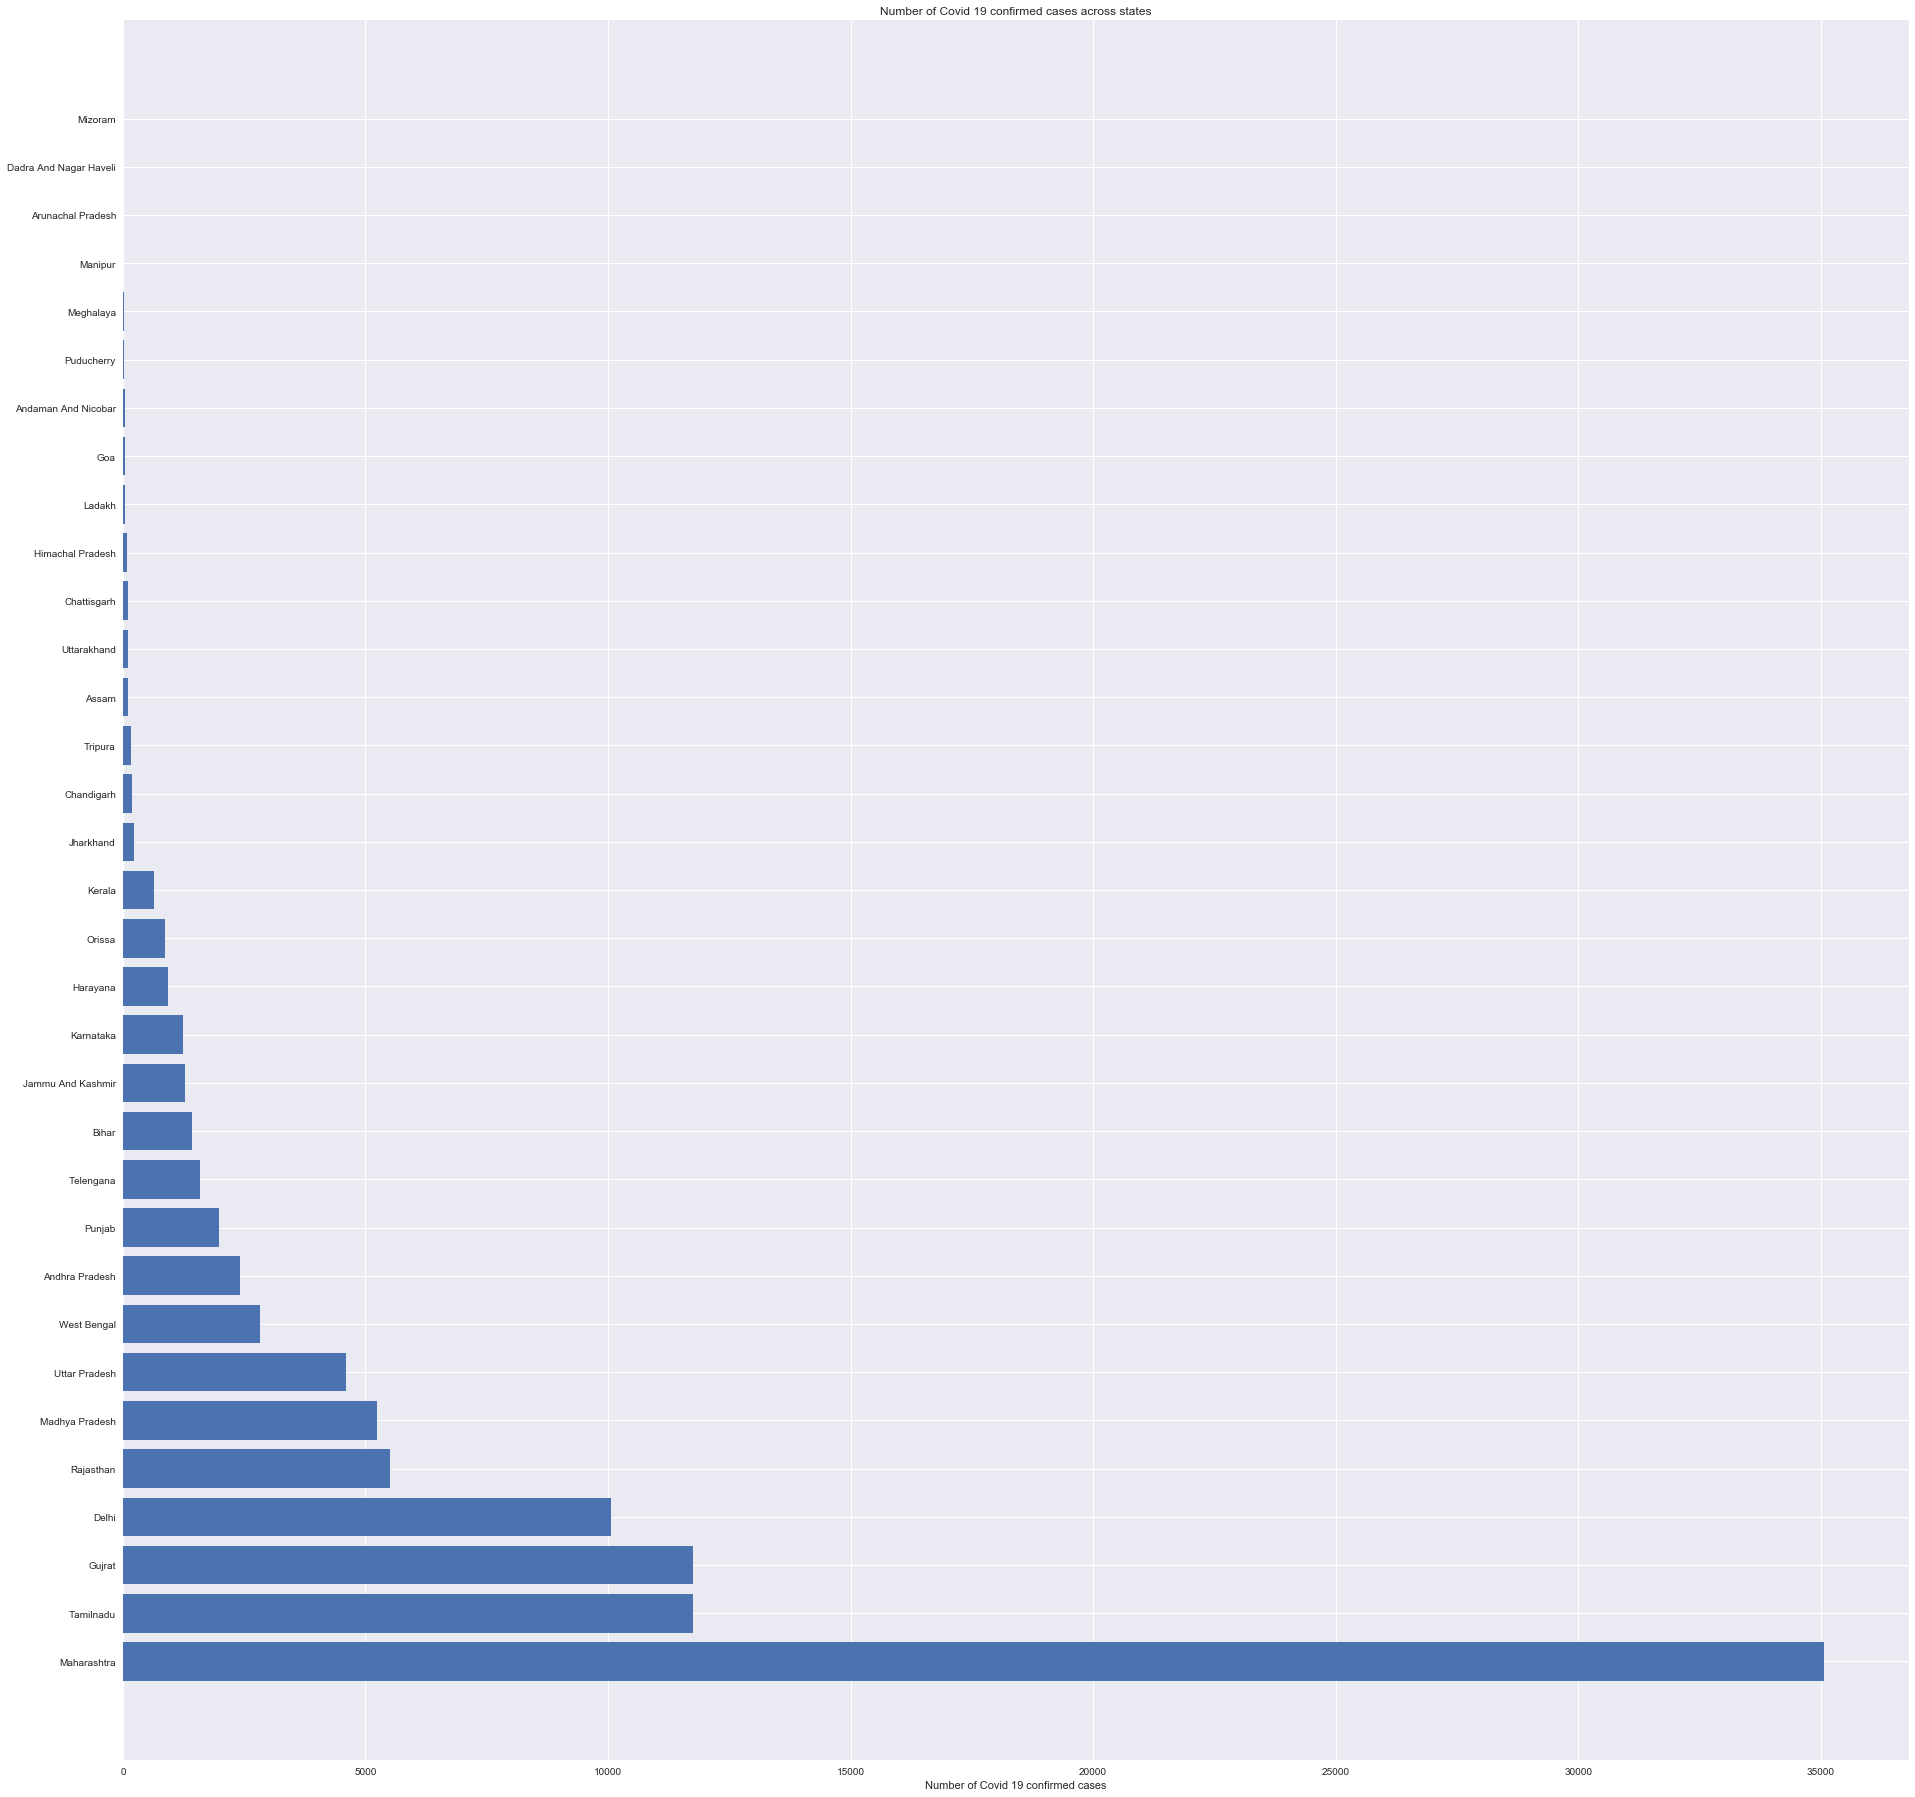

In [88]:
# plot a graph to see the total confirmed cases across different states

plt.figure(figsize=(32, 32))
plt.barh(unique_states, state_confirmed_cases)
plt.title('Number of Covid 19 confirmed cases across states')
plt.xlabel('Number of Covid 19 confirmed cases')
plt.show()

In [91]:
# only ten states with the most confirmed cases are shown, rest are clubbed into a category 'others'

visual_unique_states = []
visual_confirmed_cases = []
others = np.sum(state_confirmed_cases[10:])
for i in range(len(state_confirmed_cases[:10])):
    visual_unique_states.append(unique_states[i])
    visual_confirmed_cases.append(state_confirmed_cases[i])

visual_unique_states.append('Others')
visual_confirmed_cases.append(others)

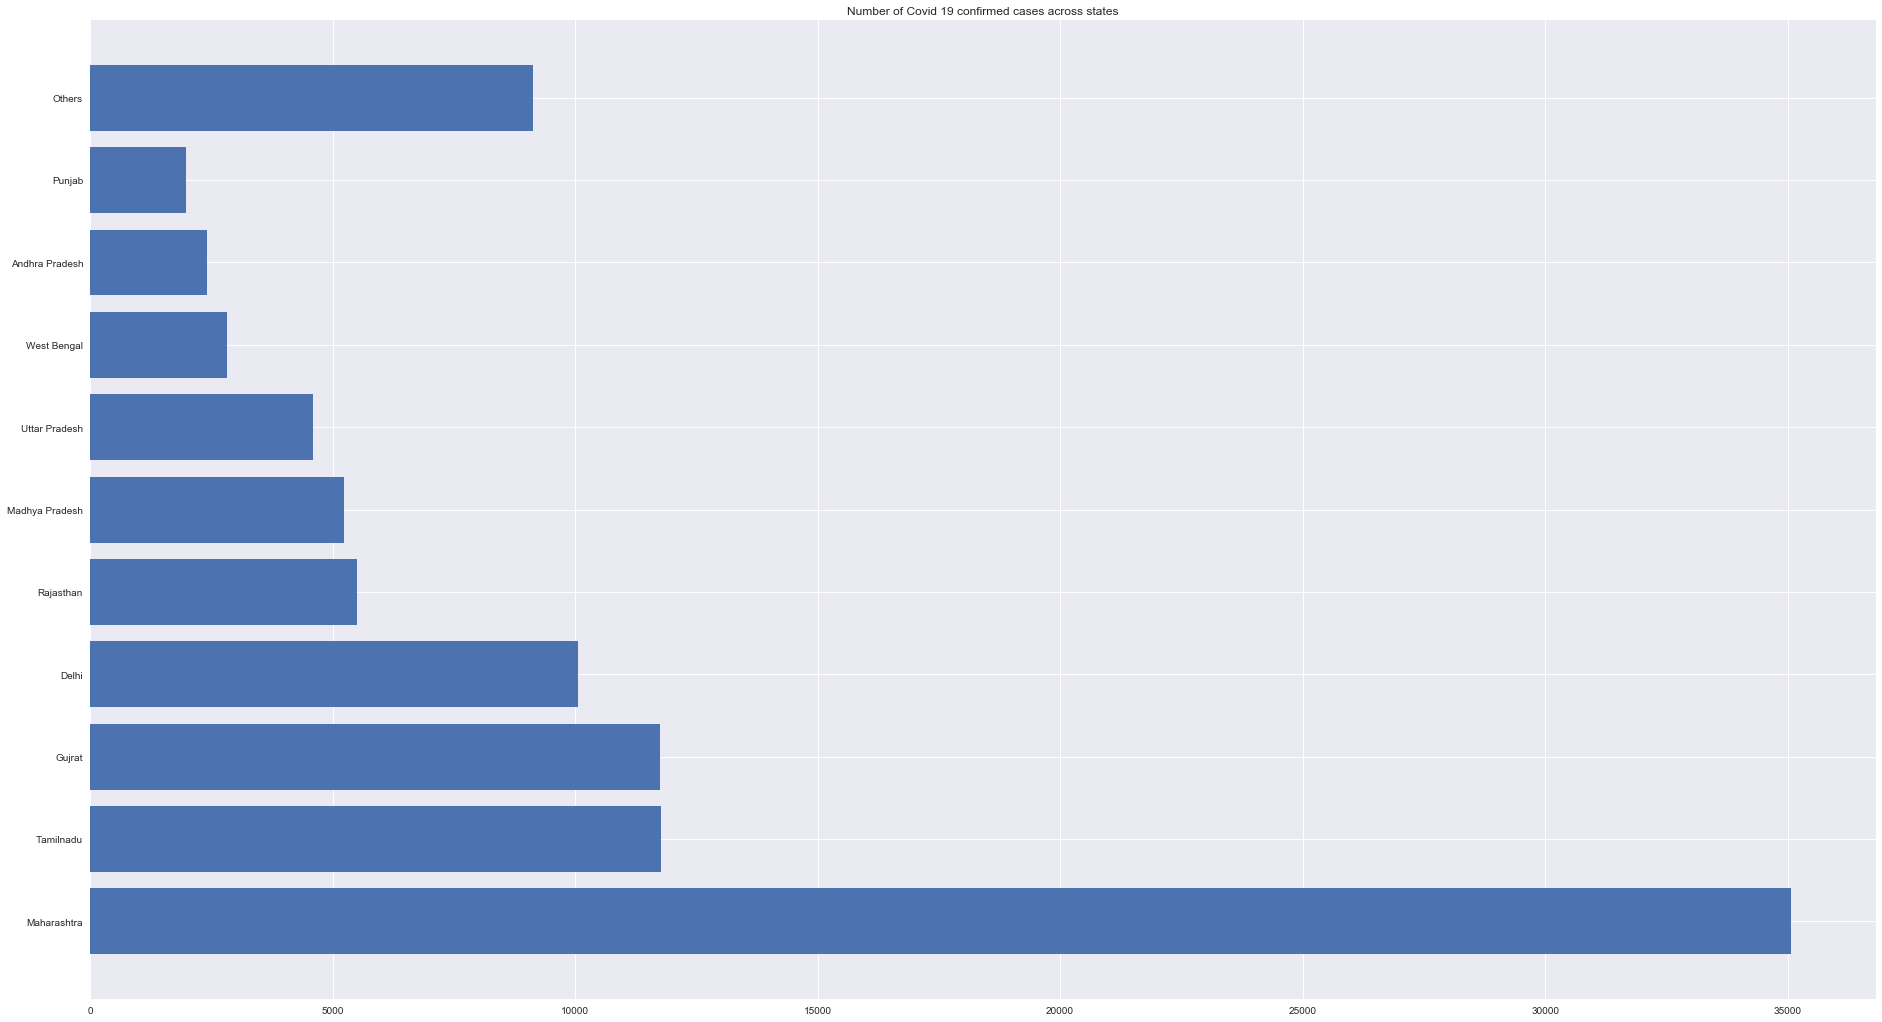

In [92]:
# Visualise the ten states

plt.figure(figsize=(32,18))
plt.barh(visual_unique_states, visual_confirmed_cases)
plt.title('Number of Covid 19 confirmed cases across states')
plt.show()

In [106]:
#Using linear regression to make predictions
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, india_cases, test_size=0.15, shuffle = False)
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 32485.849854862114
MSE: 1133029296.1740944


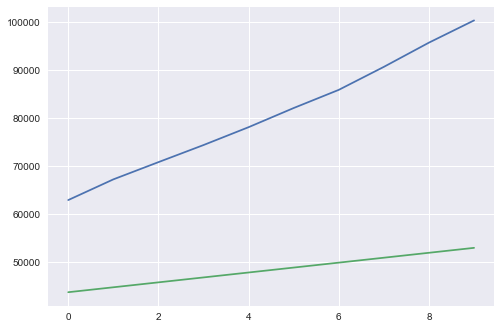

In [107]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

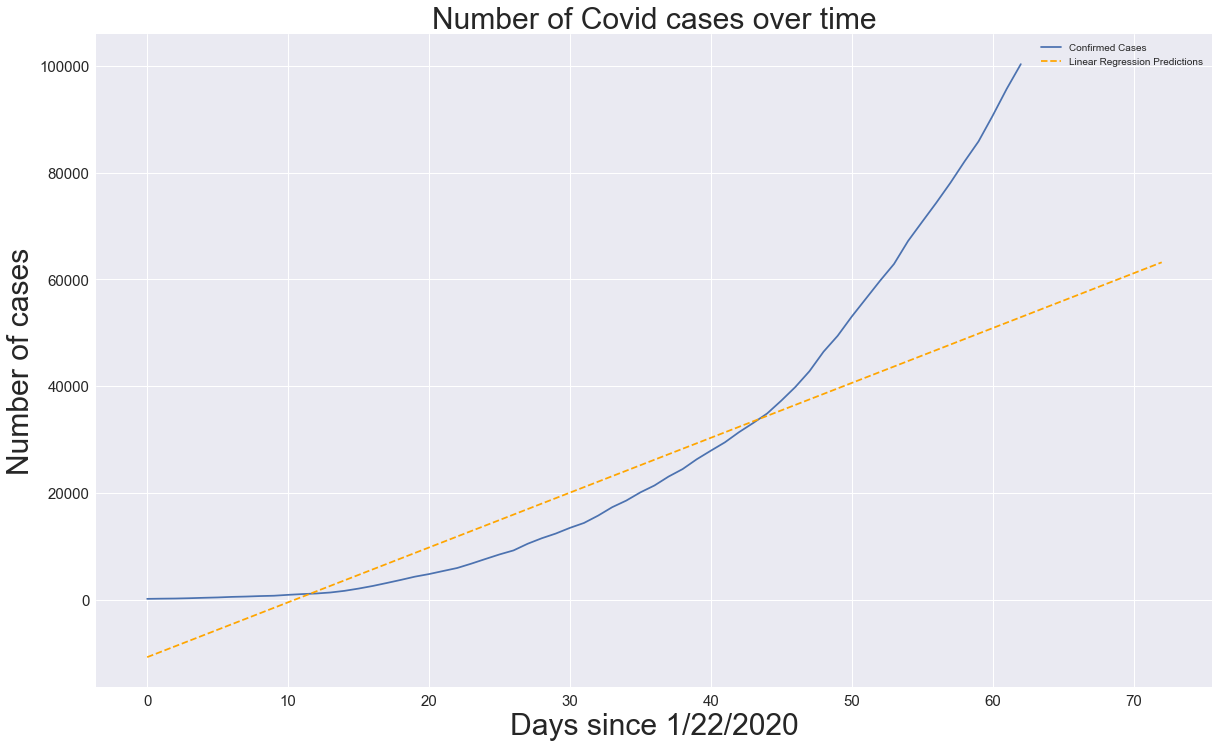

In [108]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, india_cases)
plt.plot(future_forecast, linear_pred, linestyle='dashed', color='orange')
plt.title('Number of Covid cases over time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [109]:
# predictions for the next ten days by Linear Regression
print('Linear Regression Future predictions: ')
print(linear_pred[-10:])

Linear Regression Future predictions: 
[[53932.83446218]
 [54960.10433801]
 [55987.37421384]
 [57014.64408966]
 [58041.91396549]
 [59069.18384132]
 [60096.45371714]
 [61123.72359297]
 [62150.9934688 ]
 [63178.26334462]]
